# Importing modules
I am using the *np.random.seed()* in order to reproduce the results. It is kind of like a tool used for debugging. Removing this line of code and inputting other numbers to the function changes our output model and predictions.

In [1]:
import pandas as pd
import numpy as np
np.random.seed(3)

from sklearn.ensemble import RandomForestClassifier

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

%matplotlib inline

<br/>
# Loading the data
We load the previously processed data which had both train and test data merged into a single list. We had saved the data using **pickle** module, so, we use the same to load the data. We separate these data into respective train and test variables.
<br/>

In [2]:
with open("data/processed.pickle", "rb") as f:
    both_data = pickle.load(f)
train = both_data[0]
test = both_data[1]
test_org = pd.read_csv("data/test.csv")
display(train.head(), test.head(), test_org.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,TitleGrp,Family,ClassBark,PS
0,0,3,1,22.0,1,0,7.2500,2.0,Mr,6,-1.0,26.0,-7399
1,1,1,2,38.0,1,0,71.2833,1.0,Mrs,2,-1.0,9.0,8392
2,1,3,2,26.0,0,0,7.9250,2.0,Miss,1,0.0,26.0,2392
3,1,1,2,35.0,1,0,53.1000,2.0,Mrs,2,-1.0,10.0,8392
4,0,3,1,35.0,0,0,8.0500,2.0,Mr,6,0.0,26.0,-7399


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,TitleGrp,Family,ClassBark,PS
0,3,1,34.5,0,0,7.8292,3,Mr,6,0.0,27,-7399
1,3,2,47.0,1,0,7.0000,2,Mrs,2,-1.0,26,2392
2,2,1,62.0,0,0,9.6875,3,Mr,6,0.0,19,-4399
3,3,1,27.0,0,0,8.6625,2,Mr,6,0.0,26,-7399
4,3,2,22.0,1,1,12.2875,2,Mrs,2,1.0,26,2392


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<br/>
# Correlation analysis
Since we have many numerical features now, we might try analysing the correlation of such features to see how much impact they have on the survivability of the passengers. The *corr* function of the pandas dataframe by default calculates the **Karl Pearson** Coefficient of numerical features available in the dataframe.

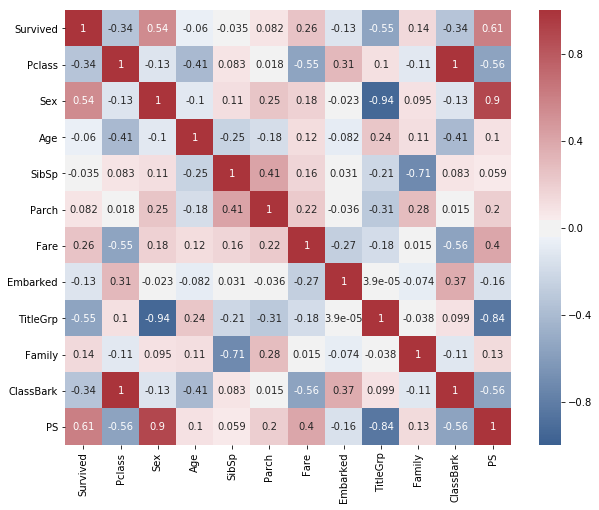

In [3]:
## Mask for hiding upper traingle from the correlation map. If needed pass this as "mask" parameter in heatmap
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Setting the sizes of the correlatioin figure map
_, ax = plt.subplots(figsize=(10,8))

# Colormap : Colors to denote correlation values
cmap = sns.diverging_palette(250 , 10, s=68, l=40, as_cmap = True )

# Plotting heatmap using seaborn
sns.heatmap(train.corr(), cmap=cmap, vmin=-1, vmax=1, annot=True)

# Creating train and test data
The feature **Title** is a remnant from the prerprocess step and needs to be discarded to make our prediction. Hence, we remove this column from both *train_X* and *test_X*.
In the *train_X* input, we do not need **Survived** because they are labels for our training data and hence will be stored in *train_y*.

In [4]:
train_X = train.drop(["Survived", "Title"], axis=1)
train_y = train["Survived"]
test_X = test.drop(["Title"], axis=1)

In [5]:
display(train_X.head(), train_y.head(), test_X.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TitleGrp,Family,ClassBark,PS
0,3,1,22.0,1,0,7.2500,2.0,6,-1.0,26.0,-7399
1,1,2,38.0,1,0,71.2833,1.0,2,-1.0,9.0,8392
2,3,2,26.0,0,0,7.9250,2.0,1,0.0,26.0,2392
3,1,2,35.0,1,0,53.1000,2.0,2,-1.0,10.0,8392
4,3,1,35.0,0,0,8.0500,2.0,6,0.0,26.0,-7399


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TitleGrp,Family,ClassBark,PS
0,3,1,34.5,0,0,7.8292,3,6,0.0,27,-7399
1,3,2,47.0,1,0,7.0000,2,2,-1.0,26,2392
2,2,1,62.0,0,0,9.6875,3,6,0.0,19,-4399
3,3,1,27.0,0,0,8.6625,2,6,0.0,26,-7399
4,3,2,22.0,1,1,12.2875,2,2,1.0,26,2392


<br>
# Final Check
Checking what types of data we are dealing with for training our model. Moreover, we also need to check that the data is complete i.e. all rows have values in all columns.

In [6]:
print(type(train_y))
train_X.info()

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null float64
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null float64
Embarked     891 non-null float64
TitleGrp     891 non-null int64
Family       891 non-null float64
ClassBark    891 non-null float64
PS           891 non-null int64
dtypes: float64(5), int64(6)
memory usage: 76.6 KB


<br/>
# Model fit
We are fitting a **Random Forest Classifier** which is an ensemble of decision trees.  
I am just setting the *n_estimators* paramter but there are a lot more you can explore to **fine-tune** the model.

In [7]:
clf_rf = RandomForestClassifier(n_estimators=77)
clf_rf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=77, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

<br/>
# Checking the accuracy of the Model 
Now that we have trained our model, we come to the moment of truth. We use the in-built *score* function to estimate the accuracy of our model. Mind you however that, we are testing the score in the **Train** dataset. So, even if we have a very high score for our **Train**, it might be due to **overfitting** as such, it might not give the same accuracy for the **Test** data.  

To properly check the accuracy, we need to separate a small yet appreciable amount of data into development(validation) data from the total **Test** data, before fitting the model. A general rule of thumb is 10-20% of the total data.

In [8]:
clf_rf.score(train_X, train_y)

0.98316498316498313

Woo hoo!! 0.98316... accuracy. That is 98.316% accuracy. Kudos! 

# Checking our Test data for completeness
We check the Test data the same way we tested our Train data.

In [9]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
Pclass       418 non-null int64
Sex          418 non-null int64
Age          418 non-null float64
SibSp        418 non-null int64
Parch        418 non-null int64
Fare         418 non-null float64
Embarked     418 non-null int64
TitleGrp     418 non-null int64
Family       418 non-null float64
ClassBark    418 non-null int64
PS           418 non-null int64
dtypes: float64(3), int64(8)
memory usage: 36.0 KB


<br/>
# Predictions
We use our previously trained model to make the predictions on our Test data.

In [10]:
predicted_y = clf_rf.predict(test_X)

<br/>
# Predictions DataFrame
We have our predictions but for proper submissions, we need to format the submission file properly. It is indicated in Kaggle that the prediction csv file needs to have exactly 2 columns, namely **PassengerId**-which was already provided in the original test.csv file-and **Survived**-which corresponds to the predictions we made in the earlier step.

In [11]:
predictions_df = pd.DataFrame()
predictions_df["PassengerId"] = test_org["PassengerId"]
predictions_df["Survived"] = predicted_y
display(predictions_df)

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


<br/>
# Saving our Predictions
The final step is to save our predictions and submit it to Kaggle, which will be the *actual* final moment of truth.

In [12]:
predictions_df.to_csv("predictions/my_prediction.csv", index=False)

<br/>
# Final Verdict
Upon submitting the prediction to Kaggle, the accuracy of the model for the **Test** dataset was found to be **0.76076** i.e. 76.076% accuracy. My assumption about the previous extremely high prediction value for the **Train** dataset was correct: it was the result of an overfitting. You can try new models or fine-tune this model to generate better predictions. 